In [47]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [48]:
%matplotlib inline

## K -means con cielab

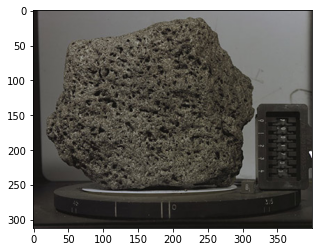

(312, 400, 3)

In [51]:
img = cv.imread('./material_TPs/TP5/roca_lunar_2.jpg')
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)
plt.show()
imgRGB.shape

In [64]:
lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)
lab.shape

(312, 400, 3)

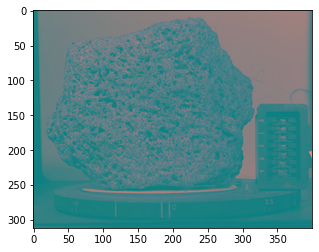

In [54]:
plt.figure()
plt.imshow(lab)
plt.show()

### Espacios de características

#### Espacio características color

In [65]:
features_color = lab.reshape((-1,3))
features_color = np.float32(features_color)
features_color.shape

(124800, 3)

##### Espacio características color + posición

In [56]:
# obtener posiciones
pos = []

for j in range(0, 312):
    for i in range(0, 400):
        pos.append((j,i))

pos= np.asarray(pos)

#obtener color
features_color = lab.reshape((-1,3))

#features finales
features_pos = np.concatenate((features_color, pos), axis=1)
features_pos = np.float32(features_pos)
features_pos.shape

(124800, 5)

### gráficas de distribuciones

#### Espacio de características de color

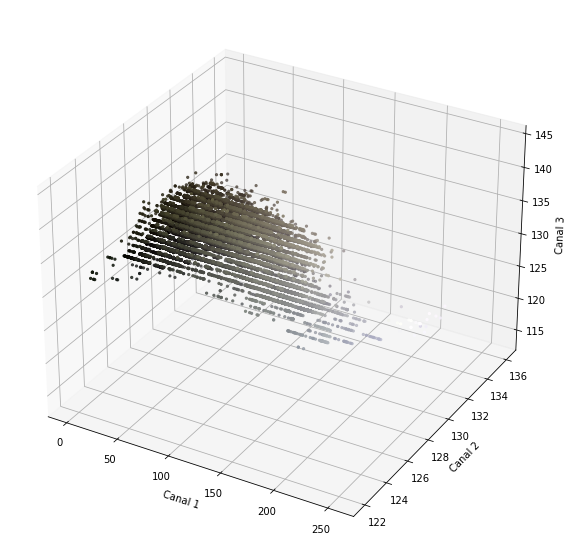

In [57]:
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(features_color[:,0], features_color[:,1], features_color[:,2], facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

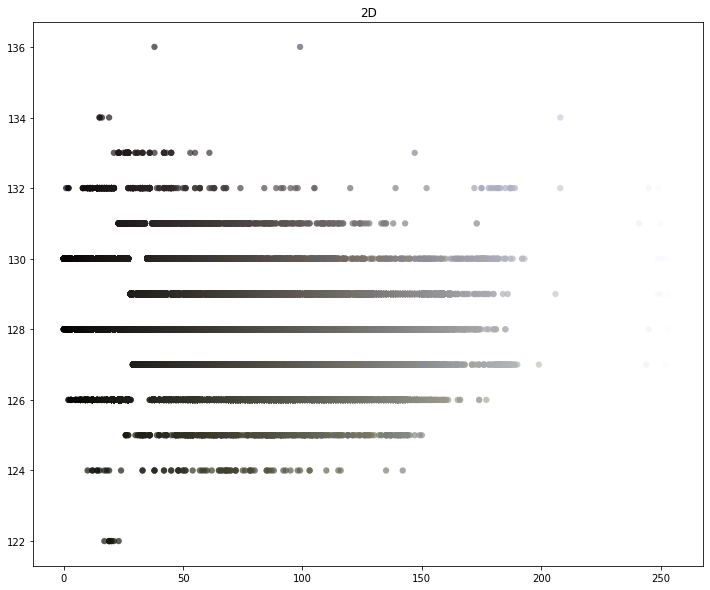

In [58]:
plt.figure(figsize=(12,10))
plt.scatter(features_color[:,0], features_color[:,1], c=pixel_colors, edgecolor='none', alpha=0.7, s=40)
plt.title('2D');

#### Espacio de características color + pos

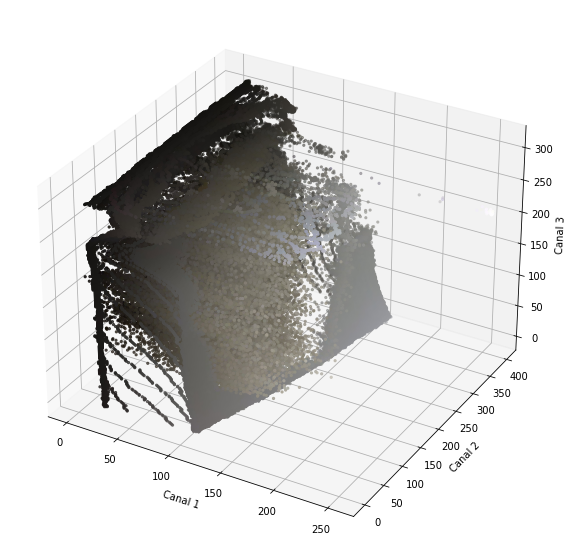

In [59]:
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(features_pos[:,0], features_pos[:,4], features_pos[:,3], facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

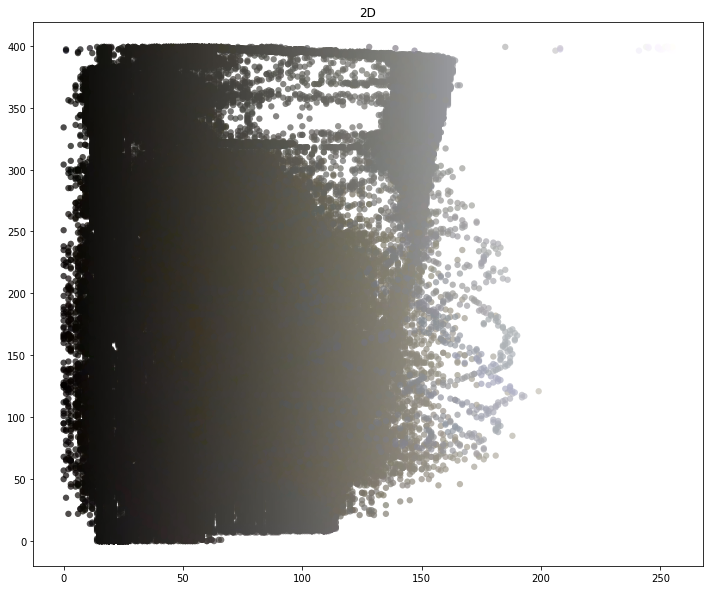

In [60]:
plt.figure(figsize=(12,10))
plt.scatter(features_pos[:,0],features_pos[:,4], c=pixel_colors, edgecolor='none', alpha=0.7, s=40)
plt.title('2D');

Es difícil identificar si hay un cluster específico para la roca porque el fondo y los otros objetos están dentro de los mismo tonos y no tienen una distribución reconocible.

### Posterización

#### Espacio de características color

In [66]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 1.0)
k = 4
compact, label, color_clusters = cv.kmeans(features_color, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [67]:
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n') 
compact = np.uint8(compact)
print('Compactación: \n {} \n'.format(compact))
label[:4]

Centroides: 
 [[102 127 133]
 [ 27 128 130]
 [142 127 128]
 [ 65 127 133]] 

Compactación: 
 136 



array([[1],
       [1],
       [1],
       [1]], dtype=int32)

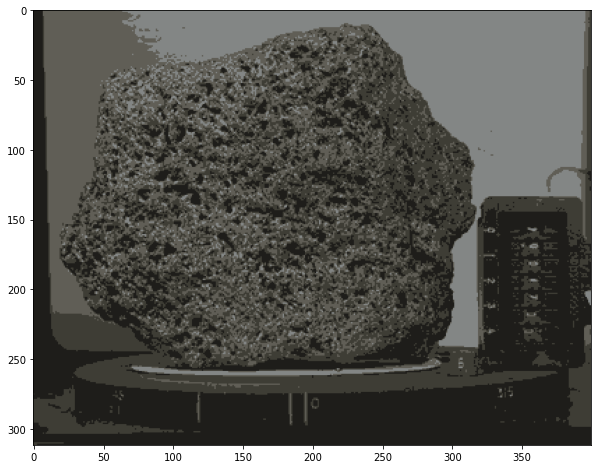

133

In [68]:
img_out = color_clusters[label.flatten()]
img_out = img_out.reshape((lab.shape))

img_rgb = cv.cvtColor(img_out,cv.COLOR_Lab2RGB)
plt.figure(figsize = (10,10))
plt.imshow(img_rgb)
plt.show()

np.max(img_out[:,0])

In [69]:
mask_list = list()
for cluster in color_clusters:
    mask = np.zeros(img_out.shape[:2],'uint8')
    mask[np.where((img_out == cluster).all(axis=2))] = 255
    mask_list.append(mask)

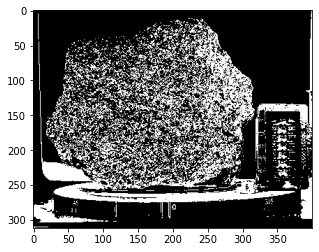

In [70]:
for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(lab, lab, mask = mask)
    plt.imshow(mask, cmap=plt.cm.gray)

#### Espacio de características color + pos

In [71]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k =10
compact, label, color_clusters = cv.kmeans(features_pos, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [72]:
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n') 
compact = np.uint8(compact)
print('Compactación: \n {} \n'.format(compact))
label[:4]

Centroides: 
 [[ 43 128 130   6  67]
 [ 48 127 132   3 222]
 [ 34 127 130   9  88]
 [ 62 127 131 176  76]
 [105 128 131  47  55]
 [143 127 128  58  81]
 [101 128 133  48 168]
 [ 82 127 134 185 155]
 [ 71 128 132 146  53]
 [ 64 128 134 108 242]] 

Compactación: 
 129 



array([[4],
       [4],
       [4],
       [4]], dtype=int32)

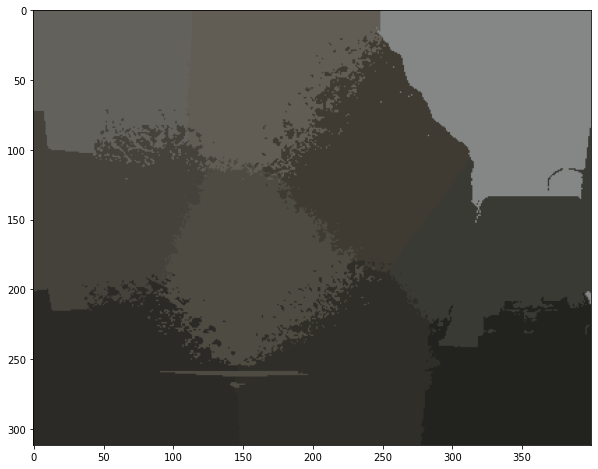

(312, 400, 3)

In [73]:
img_out_2 = color_clusters[label.flatten()]
img_out_2 = img_out_2[:,:3].reshape((lab.shape))

img_rgb = cv.cvtColor(img_out_2,cv.COLOR_Lab2RGB)
plt.figure(figsize = (10,10))
plt.imshow(img_rgb)
plt.show()

img_out_2.shape

### Prueba con Mean Shift

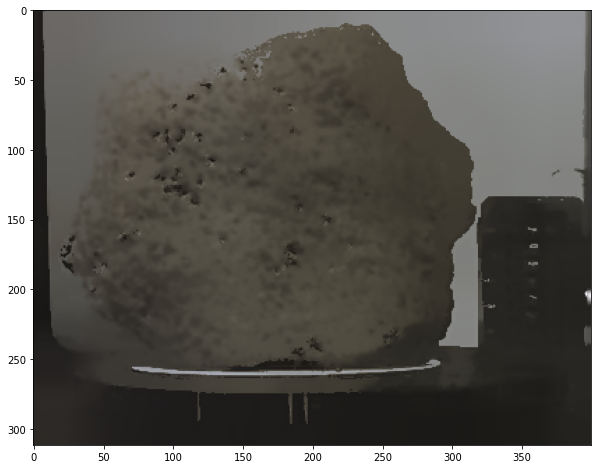

In [76]:
sp = 20
sr = 40

img_out_3=cv.pyrMeanShiftFiltering(imgRGB, sp, sr)

plt.figure(figsize=(10,10))
plt.imshow(img_out_3)


### Conclusiones

Pareciera que para esta imagen resultaría mejor usar algún otro espacio de características que no sea color. Podría usarse lbp dada la textura de la roca o probar algún otro espacio como HSV para ver si la distribución es paramétrica que ayude a la clusterización. 